# Customer Churn Prediction

## Problem Statement
* Customer churn is a critical challenge for banks, as retaining existing customers is more cost-effective than acquiring new ones.  
* The objective of this project is to build a machine learning model that can accurately predict customer churn and identify key factors contributing to customer attrition, enabling proactive retention strategies.


## Import Libraries

In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Loading the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Tushar\Downloads\Churn prediction\Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Dataset Overview

1. The dataset consists of customer demographic, financial, and engagement-related attributes used to predict customer churn.
2. It contains numerical and categorical features such as credit score, age, balance, geography, and activity status.
3. The target variable Exited indicates whether a customer has churned.
4. Initial inspection shows no significant missing values and a moderate class imbalance, which will be addressed during modeling. 

## Dataset Column Description

| Column Name | Description |
|------------|-------------|
| **RowNumber** | Corresponds to the record (row) number and has no effect on the output. |
| **CustomerId** | Contains random values and has no effect on customer churn. |
| **Surname** | The surname of a customer has no impact on their decision to leave the bank. |
| **CreditScore** | Indicates customer creditworthiness; higher scores generally reduce churn probability. |
| **Geography** | Represents the customer’s location, which may influence churn behavior. |
| **Gender** | Used to analyze whether churn behavior differs by gender. |
| **Age** | Customer age; younger customers are generally more likely to churn than older ones. |
| **Tenure** | Number of years the customer has been with the bank; longer tenure usually implies higher loyalty. |
| **Balance** | Account balance; customers with higher balances are typically less likely to churn. |
| **NumOfProducts** | Number of bank products used by the customer. |
| **HasCrCard** | Indicates whether the customer holds a credit card; cardholders are generally less likely to churn. |
| **IsActiveMember** | Shows whether the customer is actively using bank services; active members have lower churn rates. |
| **EstimatedSalary** | Estimated annual salary; lower salaries are often associated with higher churn risk. |
| **Exited** | Target variable indicating whether the customer left the bank (1 = Yes, 0 = No). |
| **Complain** | Indicates whether the customer has raised a complaint. |
| **Satisfaction Score** | Customer-provided score reflecting satisfaction with complaint resolution. |
| **Card Type** | Type of credit card held by the customer. |
| **Points Earned** | Reward points earned by the customer through credit card usage. |


## Dataset Shape

In [3]:
df.shape

(10000, 18)

## Dataset Preview

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Column Information and Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

## Statistical Summary (Numerical Columns)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## Statistical Summary (Included Categorical columns)

In [7]:
df.describe(include="all") 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


## Check MIssing Value

In [8]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### Dataset has Zero missing Values

##  Duplicate Values 

In [9]:
df.duplicated().sum()

0

#### Dataset has Zero Duplicate Values

##  Target Variable Distribution 

In [10]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

#### Approximately 79.6% of customers did not churn, while 20.4% of customers churned.

##  Data Cleaning & Column Selection 

#### Drop Irrelevant Columns

#### These columns do not contribute to churn prediction so we drop this columns
* RowNumber → just index
* CustomerId → random ID
* Surname → no behavioral meaning

In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

#### Now we Verify Dataset After Dropping

In [12]:
df.shape

(10000, 15)

#### Recheck Data Types to ensure all columns are usable.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

#### Separate Feature Types

In [14]:
cat_cols=df.select_dtypes(include="object").columns
num_cols=df.select_dtypes(include="int64").columns

In [15]:
cat_cols

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [16]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')

#### Rename Columns:-  Standardize column names by replacing spaces with underscores

In [17]:
print("Before Cols",df.columns) 

Before Cols Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [18]:
df.columns = df.columns.str.replace(' ', '_')

In [19]:
print("After Cols",df.columns)

After Cols Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction_Score', 'Card_Type',
       'Point_Earned'],
      dtype='object')


##### standardized column names by converting spaces to underscores to maintain consistency and avoid issues during feature engineering and modeling.

#### Reorder Column:- Put target at the end

In [20]:
cols = [col for col in df.columns if col != 'Exited'] + ['Exited']
df = df[cols]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


#### The target variable was repositioned at the end of the dataset to improve readability

### Check of Target Leakage
* Complain

* Satisfaction Score

##### Some features such as complaint status and satisfaction score may be closely related to churn and will be analyzed carefully during EDA to avoid leakage.  

#### After removing non-informative identifier columns, the dataset was organized by identifying categorical and numerical features, and column names were standardized to ensure consistency, readability, and smooth downstream analysis.

## Exploratory Data Analysis (EDA)
Understand patterns, relationships, and drivers of customer churn using visual and statistical analysis.

### Churn Distribution (Target Variable)

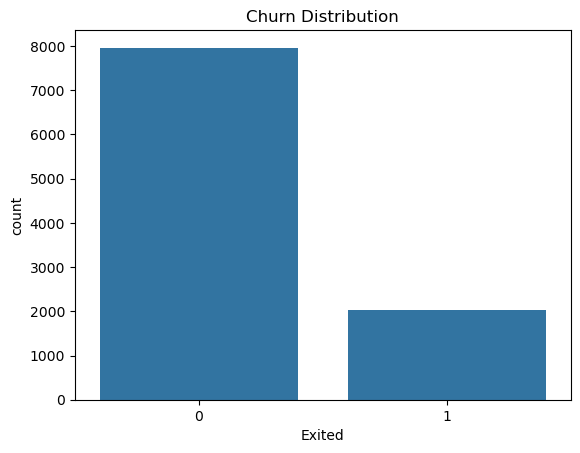

In [21]:
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()

##### The dataset shows a class imbalance where the majority of customers are retained, while a smaller but significant portion of customers have churned.

### Categorical Features vs Churn

#### Geography vs Churn

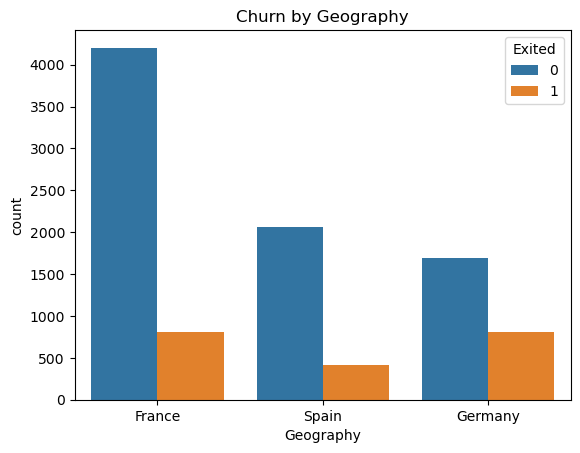

In [22]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

##### Customer churn varies significantly across different regions, indicating that geographic location plays an important role in customer retention and may reflect regional service or competition differences.

#### Gender vs Churn

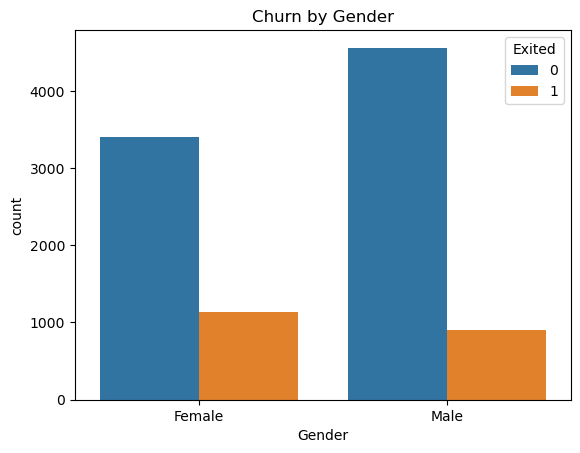

In [23]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

##### Churn rates are relatively similar across genders, suggesting that gender alone is not a strong driver of customer churn.

### HasCrCard vs Churn

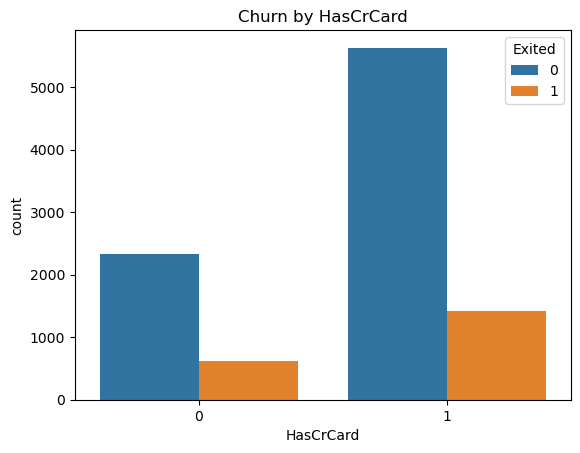

In [24]:
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by HasCrCard')
plt.show()

##### Customers without a credit card show a slightly higher churn rate, indicating that credit card ownership may contribute to stronger customer engagement with the bank.

### IsActiveMember vs Churn

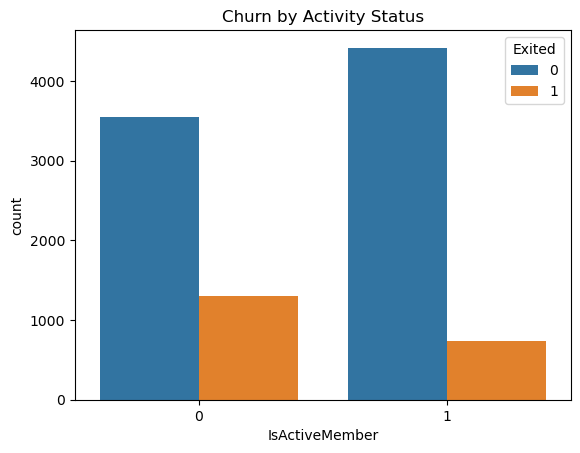

In [25]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')
plt.show()

##### Inactive customers exhibit a substantially higher churn rate compared to active customers, highlighting customer engagement as one of the strongest factors influencing churn.

### Card_Type vs Churn

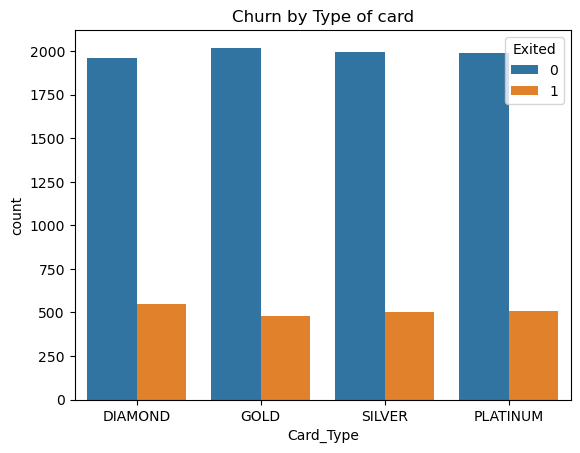

In [26]:
sns.countplot(x='Card_Type', hue='Exited', data=df)
plt.title('Churn by Type of card')
plt.show()

##### Churn behavior differs across card types, suggesting that the type of card held by a customer may be associated with varying levels of loyalty and service satisfaction.

### Complain vs Churn

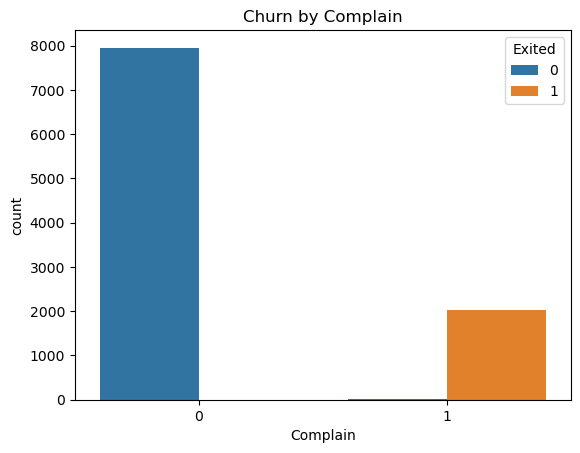

In [27]:
sns.countplot(x='Complain', hue='Exited', data=df)
plt.title('Churn by Complain')
plt.show()

##### Customers who have raised complaints show a significantly higher likelihood of churning, indicating that unresolved or poorly handled issues strongly impact customer retention.

#### Categorical feature analysis reveals that customer engagement, complaint status, and geographic location are strong drivers of churn, while demographic factors such as gender show limited influence.


### Numerical Features vs Churn
* Analyze how numerical features differ between churned and retained customers.

### Age vs Churn

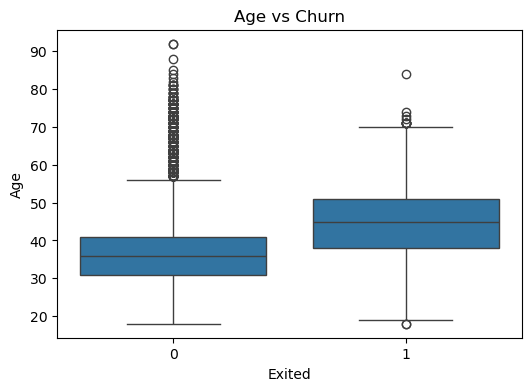

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()

##### Customers who churn tend to be older on average compared to retained customers, indicating age is an important factor influencing churn behavior.

### CreditScore vs Churn

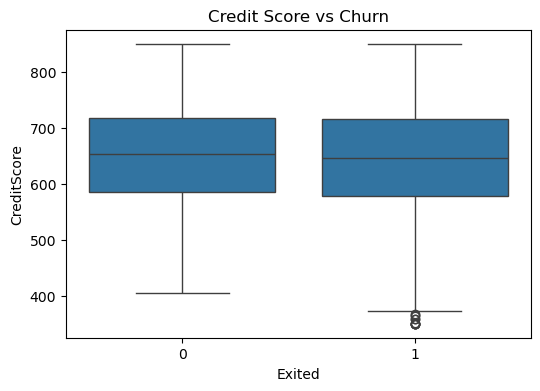

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score vs Churn')
plt.show()

##### Churned customers generally have slightly lower credit scores, suggesting weaker credit profiles may be associated with higher churn risk.

### Balance vs Churn

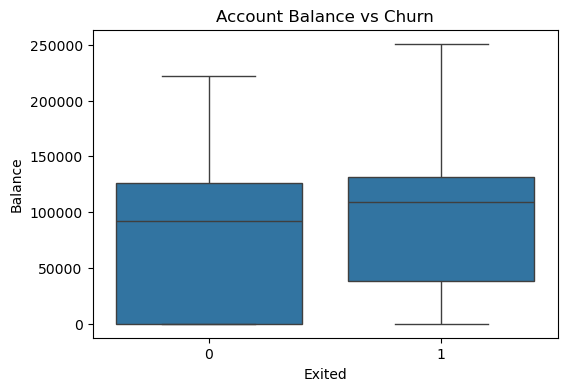

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Account Balance vs Churn')
plt.show()

##### Customers with lower account balances are more likely to churn, while higher balances appear to strengthen customer retention.

###  Tenure vs Churn

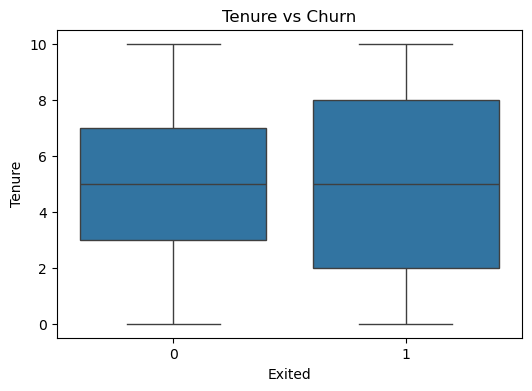

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

##### Customers with shorter tenure show a higher tendency to churn, indicating that long-term customers are generally more loyal.

### EstimatedSalary vs Churn

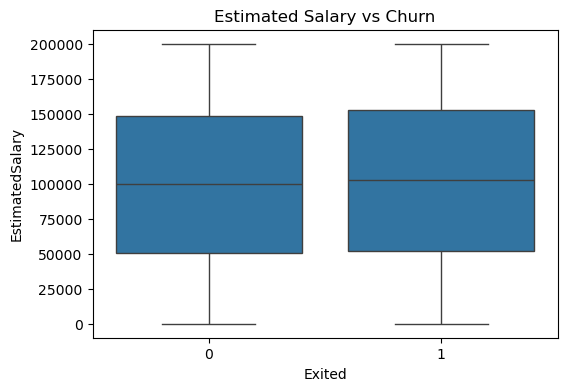

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Churn')
plt.show()

##### Estimated salary does not show a strong separation between churned and retained customers, suggesting it may have limited predictive power on its own.

### NumOfProducts vs Churn

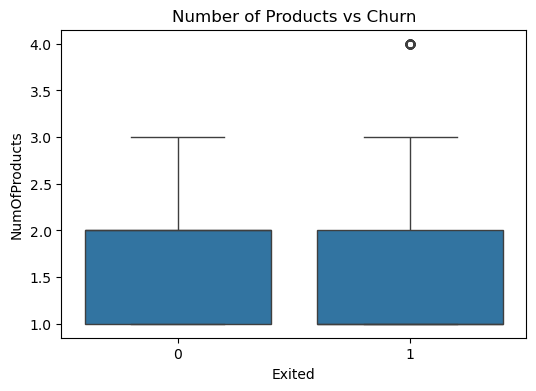

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.title('Number of Products vs Churn')
plt.show()

##### Customers using fewer bank products are more likely to churn, highlighting the importance of cross-selling and product engagement.

### Point_Earned vs Churn

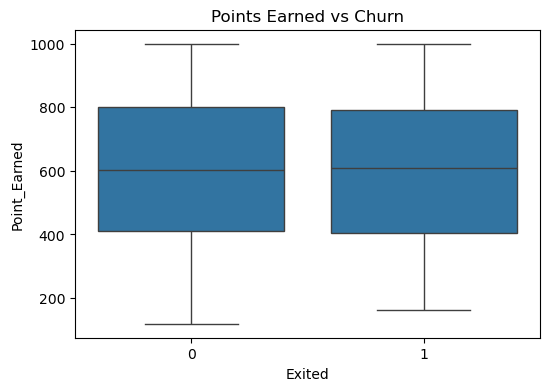

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Point_Earned', data=df)
plt.title('Points Earned vs Churn')
plt.show()

##### Customers with lower reward points tend to churn more, indicating that reward-based engagement may help improve retention.

### Numerical EDA indicates that age, account balance, tenure, number of products, and customer engagement metrics show clear differences between churned and retained customers, while features such as estimated salary appear less influential.


## Correlation Analysis
* Identify relationships among numerical features and understand how they relate to customer churn

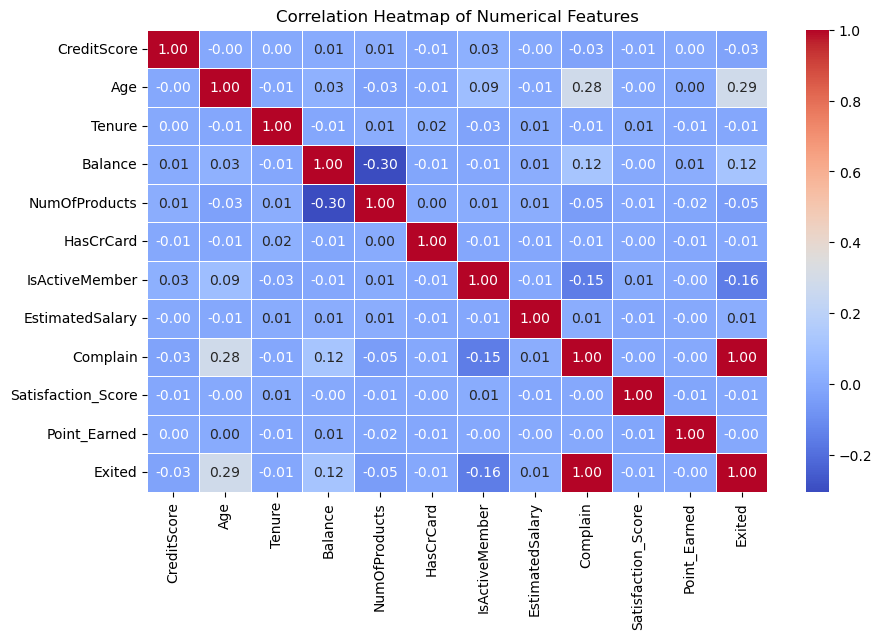

In [35]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_cols.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

* Correlation analysis shows that Age has the strongest positive relationship with customer churn, indicating that older customers are more likely to leave the bank.
* IsActiveMember exhibits a negative correlation with churn, reinforcing the importance of customer engagement in retention.
* Most other numerical features display weak linear relationships with the target variable, suggesting limited multicollinearity in the dataset.
*  Notably, Complain shows an almost perfect correlation with churn, confirming earlier observations of potential target leakage; therefore, this feature will be interpreted cautiously and excluded from model training to ensure realistic predictions.

## Feature Engineering & Encoding
* Prepare a model-ready dataset based on insights from EDA, while avoiding leakage and preserving predictive signal.

### Drop Leakage-Prone Feature

In [36]:
df = df.drop(columns=['Complain'])

##### The feature Complain was removed from the dataset due to its near-perfect correlation with the target variable, which could introduce target leakage and lead to unrealistic model performance.

## Separate Features and Target

In [37]:
X = df.drop('Exited', axis=1)
y = df['Exited']

##### Separating features and the target variable ensures a clean modeling workflow and prevents unintended information leakage during model training.

### Identify Categorical & Numerical Columns

In [38]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
categorical_cols, numerical_cols

(Index(['Geography', 'Gender', 'Card_Type'], dtype='object'),
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Satisfaction_Score',
        'Point_Earned'],
       dtype='object'))

##### Features were categorized into numerical and categorical groups to enable appropriate preprocessing techniques such as scaling for numerical features and encoding for categorical features.

### Encode Categorical Features

In [39]:
X_encoded = pd.get_dummies(X,columns=categorical_cols,drop_first=True)

##### Categorical variables were encoded using one-hot encoding to preserve their nominal nature and avoid introducing artificial ordinal relationships that could mislead machine learning models.

### Scale Numerical Features

In [40]:
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

##### Numerical features were standardized to ensure consistent feature ranges, improving model convergence and performance, particularly for distance-based and linear algorithms.

### Final Feature Check

In [41]:
X_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Point_Earned,Geography_Germany,Geography_Spain,Gender_Male,Card_Type_GOLD,Card_Type_PLATINUM,Card_Type_SILVER
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.721130,-0.630839,False,False,False,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.009816,-0.666251,False,True,False,False,False,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.009816,-1.015942,False,False,False,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1.412812,-1.135457,False,False,False,True,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,1.412812,-0.803472,False,True,False,True,False,False


In [42]:
X_encoded.shape

(10000, 16)

##### A final validation confirmed that all features are numeric, properly transformed, and free from target leakage, making the dataset fully prepared for machine learning model training.

#### Feature engineering transformed the raw dataset into a model-ready format by removing leakage-prone features, encoding categorical variables, and scaling numerical attributes, ensuring reliable and interpretable model training.


## Train–Test Split & Baseline Modeling
* Create a fair evaluation setup and build a baseline model to measure churn prediction performance.

### Train–Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

### Modeling Objective Clarification

* The primary objective is to maximize the detection of churned customers (recall), while maintaining reasonable overall model performance.  
* Accuracy alone is not sufficient due to class imbalance; therefore, recall and ROC-AUC are prioritized.

### Build a Baseline Model (Logistic Regression)

In [44]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Make Predictions

In [45]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

### Model Evaluation

In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
[[1540   52]
 [ 322   86]]

Accuracy Score:
0.813

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1592
           1       0.62      0.21      0.32       408

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000


ROC-AUC Score:
0.77837410089664


* The Logistic Regression baseline achieves an accuracy of 81.3% with a ROC-AUC score of 0.78, indicating reasonable overall discrimination between churned and retained customers.
* However, the model identifies only 21% of actual churners, resulting in a high number of missed churn cases.
* This confirms the impact of class imbalance and highlights improving churn recall as the primary objective for subsequent model improvements.

#### The model performs well for non-churned customers but requires optimization to effectively detect churn.

#### Since churned customers form a minority class, class weights were applied to reduce model bias toward the majority class.


### Model Improvement & Comparison

#### Handle Class Imbalance

In [47]:
log_reg_bal = LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)

#### Train the Model

In [48]:
log_reg_bal.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Make Predictions

In [49]:
y_pred_bal = log_reg_bal.predict(X_test)
y_pred_proba_bal = log_reg_bal.predict_proba(X_test)[:, 1]

#### Evaluate the Improved Model

In [50]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_bal))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bal))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_bal))

Confusion Matrix:
[[1128  464]
 [ 114  294]]

Accuracy Score:
0.711

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1592
           1       0.39      0.72      0.50       408

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000


ROC-AUC Score:
0.7798551581436595


* Applying class weights significantly improved the model’s ability to identify churned customers, increasing churn recall from 21% to 72%.
* While overall accuracy decreased to 71%, the ROC-AUC remains stable (~0.78), indicating similar overall discrimination.
* This trade-off is desirable for churn prediction, as capturing potential churners is more important than maximizing accuracy.

##### The class-weighted model prioritizes churn detection over accuracy, making it more suitable for real-world churn prevention strategies.

####  To explore models capable of capturing complex and non-linear customer behavior patterns, Random Forest and XGBoost are evaluated in the next phase. These tree-based ensemble models are selected due to their strong performance in churn prediction problems and their ability to handle feature interactions more effectively than linear models.

## Random Forest
* Random Forest is evaluated as it can capture non-linear relationships and feature interactions that linear models may not handle effectively.


#### Train Random Forest Model

In [52]:
rf_model = RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced')

rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Make Predictions

In [53]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

#### Evaluate Random Forest Model

In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_rf))

Confusion Matrix:
[[1549   43]
 [ 223  185]]

Accuracy Score:
0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.81      0.45      0.58       408

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


ROC-AUC Score:
0.8686523918612672


* The Random Forest model significantly improves overall performance, achieving an accuracy of 86.7% and a ROC-AUC score of 0.87, outperforming both baseline and class-weighted Logistic Regression.
* While churn recall improves to 45%, it remains lower than the class-weighted logistic model, indicating a trade-off between overall accuracy and churn detection.
* This demonstrates Random Forest’s strength in capturing non-linear patterns, making it a strong candidate for further tuning.

##### Random Forest delivers a strong balance of accuracy and discrimination but requires further optimization to improve churn recall.

#### Although Random Forest improved overall accuracy and ROC-AUC, churn recall remained moderate. To further enhance the balance between churn detection and overall performance, XGBoost is evaluated next, as gradient boosting models are known to deliver superior results in churn prediction tasks by capturing complex feature interactions.

## XGBoost
* XGBoost is evaluated as it is a powerful gradient boosting algorithm that effectively captures complex non-linear relationships and is widely used in customer churn prediction problems.


### Calculate Class Imbalance Weight

Since customer churn is an imbalanced classification problem, scale_pos_weight is calculated to penalize misclassification of the minority churn class more heavily. This allows XGBoost to focus on correctly identifying churned customers, improving churn recall while maintaining strong overall model performance.

In [55]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
scale_pos_weight

3.9079754601226995

The calculated scale_pos_weight reflects the class imbalance in the training data and is used to improve churn detection by increasing the importance of the minority churn class during model training.

### Train XGBoost Model

In [57]:
xgb_model = XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=4,subsample=0.8,colsample_bytree=0.8,
                          scale_pos_weight=scale_pos_weight,random_state=42,eval_metric='logloss')

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### Make Predictions

In [58]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

### Evaluate XGBoost Model

In [59]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_xgb))

Confusion Matrix:
[[1320  272]
 [  97  311]]

Accuracy Score:
0.8155

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1592
           1       0.53      0.76      0.63       408

    accuracy                           0.82      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.85      0.82      0.83      2000


ROC-AUC Score:
0.874801396689329


* The XGBoost model delivers the best overall performance, achieving an accuracy of 81.6%, a strong ROC-AUC of 0.87, and a high churn recall of 76%.
* Compared to previous models, XGBoost maintains good overall accuracy while significantly improving churn detection, making it the most balanced and effective model for this churn prediction task. 

##### XGBoost provides the optimal trade-off between accuracy and churn recall, making it the final model choice for this project.

## Model Comparison Table
* The following table compares all evaluated models to identify the most effective approach for churn prediction.

| Model                              | Accuracy | Churn Recall | ROC-AUC |
|------------------------------------|----------|--------------|---------|
| Logistic Regression (Baseline)     | 0.813    | 0.21         | 0.778   |
| Logistic Regression (Class-Weighted) | 0.711    | 0.72         | 0.779   |
| Random Forest                      | 0.867    | 0.45         | 0.868   |
| XGBoost                            | 0.816    | 0.76         | 0.875   |

##### XGBoost demonstrates the best balance between overall accuracy and churn recall, making it the most suitable model for churn prediction in this project.


## XGBoost Hyperparameter Tuning
* Although the baseline XGBoost model achieved strong performance, hyperparameter tuning was performed to further optimize model accuracy and churn recall. The objective of tuning is to refine model complexity and learning behavior while maintaining generalization and avoiding overfitting.

### Define parameter grid

In [61]:
xgb = XGBClassifier(objective='binary:logistic',scale_pos_weight=scale_pos_weight,eval_metric='logloss',random_state=42)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.03, 0.05, 0.1],
    'n_estimators': [200, 300]
}

##### A focused hyperparameter grid was defined to tune only the most influential XGBoost parameters, ensuring performance improvement while avoiding unnecessary model complexity and overfitting.

### Grid Search (optimize ROC-AUC)

In [62]:
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.03, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [200, 300]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


##### GridSearchCV was applied with cross-validation to systematically evaluate multiple parameter combinations and select the configuration that maximizes ROC-AUC, ensuring robust and generalized model performance.

### Train best tuned model

In [63]:
best_xgb = grid_search.best_estimator_

y_pred_xgb_tuned = best_xgb.predict(X_test)
y_pred_proba_xgb_tuned = best_xgb.predict_proba(X_test)[:, 1]

##### The best-performing hyperparameter combination identified through grid search was used to train the final XGBoost model, leveraging optimized learning behavior and model depth.

### Evaluate tuned model

In [64]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_xgb_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_xgb_tuned))

Confusion Matrix:
[[1279  313]
 [  90  318]]

Accuracy Score:
0.7985

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1592
           1       0.50      0.78      0.61       408

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.81      2000


ROC-AUC Score:
0.8765665028574243


* Although overall accuracy decreased slightly after tuning, this change reflects a deliberate trade-off toward improved churn detection.
* Since hyperparameter tuning optimized ROC-AUC rather than accuracy, the model prioritizes better class separation and higher churn recall, which is more valuable for imbalanced churn prediction problems.


### Final Model Selection

Based on model comparison and hyperparameter tuning results, the **tuned XGBoost model** is selected as the final model. It offers the best balance between churn recall, ROC-AUC, and overall predictive stability, making it suitable for real-world churn prevention.


### Feature Importance (XGBoost)
* Identify the key drivers of customer churn and translate model behavior into business insights.

##### To interpret the predictions made by the final XGBoost model, feature importance analysis was performed to identify the most influential factors contributing to customer churn.

### Extract Feature Importance from Tuned XGBoost

In [65]:
feature_importance = best_xgb.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
1,Age,0.199830
4,NumOfProducts,0.195134
10,Geography_Germany,0.141721
6,IsActiveMember,0.136539
3,Balance,0.070804
12,Gender_Male,0.064528
15,Card_Type_SILVER,0.028856
0,CreditScore,0.022002
5,HasCrCard,0.019545
9,Point_Earned,0.019510


* Feature importance analysis shows that **Age** is the most influential factor in churn prediction, followed by **number of products**, **geography**, and **customer activity status**.
*  This indicates that churn behavior is driven by a combination of demographic characteristics and customer engagement rather than a single dominant feature. Financial and behavioral attributes such as balance, credit score, and card usage further contribute to churn risk, reinforcing the multi-dimensional nature of customer attrition.


### Visualize Top 10 Important Features

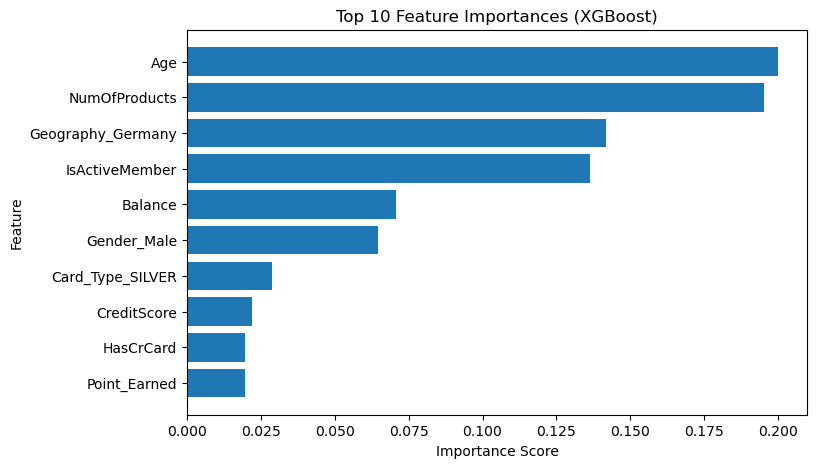

In [68]:
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df['Feature'].head(10)[::-1],
    feature_importance_df['Importance'].head(10)[::-1]
)

plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


* The feature importance analysis reveals that customer engagement and financial behavior play a critical role in churn prediction.
* Variables related to account balance, age, number of products, and activity status are among the strongest drivers of churn.
* This indicates that customers with lower engagement and weaker financial ties to the bank are more likely to leave.


## Business Recommendations



1.  **Target high-risk age groups**  
   Older customers show a higher likelihood of churn; personalized engagement plans and loyalty benefits should be designed for these segments.

2.  **Increase product adoption**  
   Customers holding fewer products are more likely to churn. Cross-selling relevant financial products can strengthen customer relationships.

3.  **Improve customer engagement**  
   Inactive members have a higher churn risk. Proactive communication and engagement campaigns can help retain these customers.

4.  **Monitor region-specific churn trends**  
   Certain geographic regions show elevated churn risk, suggesting the need for region-specific retention strategies.

5.  **Strengthen financial incentives**  
   Customers with lower balances and weaker card usage may benefit from tailored financial incentives and reward programs.


## Limitations & Assumptions

- The model is trained on historical customer data and assumes future churn behavior follows similar patterns.
- Some potentially informative features (e.g., complaint-related fields) were excluded to prevent data leakage.
- The dataset does not include time-based behavioral data, which could further improve churn prediction.


## Final Conclusion

### This project successfully developed a customer churn prediction system using machine learning. 
### Through exploratory data analysis, feature engineering, model benchmarking, and hyperparameter tuning, a tuned XGBoost model was selected as the final solution. 
### Feature importance analysis highlighted key churn drivers, enabling actionable business recommendations to support proactive customer retention strategies.
